## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [19]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [91]:
data.shape

(1000, 21)

In [ ]:
#для себя
#data.apply(lambda x: None if x.housing == 'rent' else x.housing, axis=1)
#data.loc[data.housing == 'rent']

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [92]:
bool(data.isna().sum().to_frame(name="Null_Count").loc[lambda x: x.Null_Count > 0].shape[0])
# False -> пропусков нет
# True -> пропуски есть

False

In [93]:
data.info() 
# также можно обратиться к столбцу Non-Null Count, как можно увидеть оттуда, во всех столбцах все значения (1000 из 1000) 
# non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
#количественные признаки: duration, amount, age;
#бинарные признаки: telephone, foreign_worker, credit_risk (вообще это все категориальные признаки, но у каждого из них 
#    всего 2 значения, и если их закодировать (0, 1), они станут бинарными);
#порядковые признаки: status, savings, employment_duration, installment_rate, present_residence, number_credits, 
#    people_liable;
#категориальные признаки: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, 
#    housing, job


#я относила признак к порядковым, если множество его значений является упорядоченным, т.е. упорядочивание его значений 
#поддается какой-то логике

#например, у нас есть признак status, который принимает следующие значения:
#no checking account,
#... < 0 DM,
#0<= ... < 200 DM
#... >= 200 DM / salary for at least 1 year
#
#очевидно, тут есть порядок

#также у нас есть признак credit_history:
#no credits taken/all credits paid back duly    
#all credits at this bank paid back duly
#existing credits paid back duly till now
#critical account/other credits elsewhere
#delay in paying off in the past
#
#упорядочивание его значений (ну например, по алфавиту) не будет иметь какого-либо смысла

#с бинарными и количественными, мне кажется, все понятно

In [120]:
data.credit_history.value_counts()

no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: credit_history, dtype: int64

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [6]:
data.groupby('purpose')[['amount']].apply(lambda x: x.mean())

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
#я не до конца уверена, что понимаю, что спрашивается, из-за этого была оштбка в точно таком же задании дз1 :), если
#спрашиваются числа относительно количества всех клиентов, то ответы 0.246 и 0.185, если относительно людей моложе 30 и
#старше 40, соответственно, то ответы 0.6666666666666666 и 0.6801470588235294, я так понимаю, речь все-таки о втором 
#варианте

In [7]:
data[(data.housing == 'rent') & (data.age < 30)].shape[0]/len(data)

0.246

In [78]:
len(data[(data.housing == 'rent') & (data.age < 30)])/len(data[data.age < 30])

0.6666666666666666

In [8]:
data[(data.housing == 'rent') & (data.age > 40)].shape[0]/len(data)

0.185

In [80]:
len(data[(data.housing == 'rent') & (data.age > 40)])/len(data[data.age > 40])

0.6801470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [82]:
(data[data.foreign_worker == 'yes']['number_credits'].apply(lambda x: x[-1]).astype('int32') > 3).sum()
#тут просто смотрим на последнее значение ("1" --> 1, "2-3" --> "3", "4-5" --> "5", ">= 6" --> "6") в каждой ячейке 
#столбца number_credits и сравниваем с 3

1

In [81]:
data[data.foreign_worker == 'yes'].number_credits.value_counts() #запросу "больше 3" соответствует значение "4-5" --> 1

1      25
2-3    11
4-5     1
Name: number_credits, dtype: int64

In [ ]:
#ответ: 1

### Задание 6 (1 балл)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

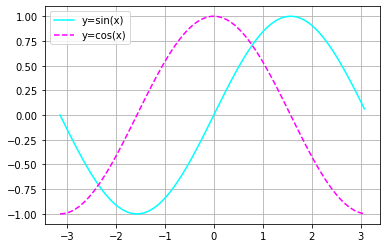

In [24]:
x = np.arange(-np.pi, np.pi, 2*np.pi/100)   # start,stop,step 2*np.pi/100
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1,color='cyan', label="y=sin(x)") 
plt.plot(x, y2, '--', color='fuchsia', label="y=cos(x)")
plt.grid()
plt.legend()
plt.show()

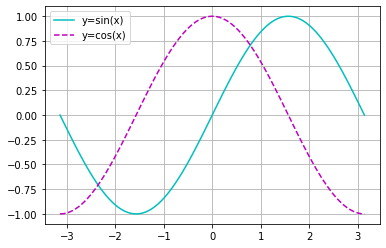

In [8]:
# your code here

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [452]:
data[data['credit_risk'] == 'good'].status.value_counts(dropna=False)

... >= 200 DM / salary for at least 1 year    348
... < 0 DM                                    164
no checking account                           139
0<= ... < 200 DM                               49
Name: status, dtype: int64

In [466]:
data['status'][data['credit_risk'] == 'bad'].value_counts(dropna=False)

no checking account                           135
... < 0 DM                                    105
... >= 200 DM / salary for at least 1 year     46
0<= ... < 200 DM                               14
Name: status, dtype: int64

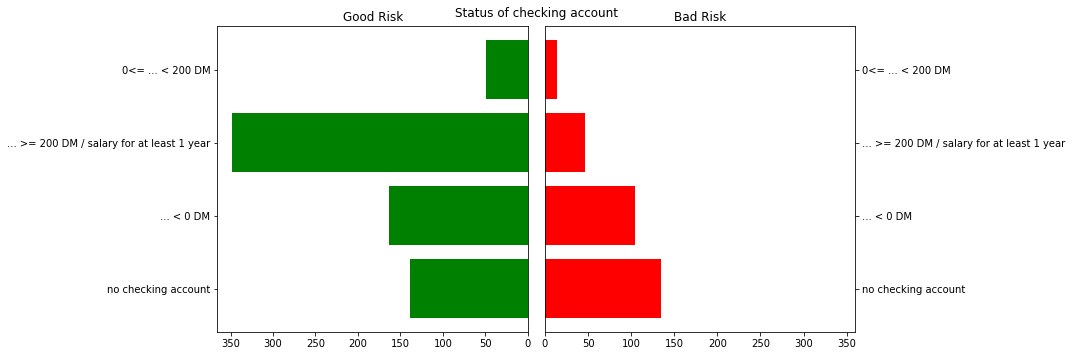

In [538]:
y = pd.DataFrame(data.status.unique(), columns=['status'])

first = y.status.apply(lambda s: (data[(data.status == s) & (data.credit_risk == 'good')].status).count())
second = y.status.apply(lambda s: (data[(data.status == s) & (data.credit_risk == 'bad')].status).count())


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax[0].barh(y.status, first, color='green')
ax[0].set_xlim(ax[0].get_xlim()[::-1])
#ax[0].yaxis.tick_left()
ax[0].title.set_text('Good Risk')

ax[1].barh(y.status, second, color='red')
ax[1].yaxis.tick_right()
ax[1].title.set_text('Bad Risk')
plt.xlim(0, 360)

fig.tight_layout() # to reduce margin

fig.suptitle('Status of checking account')

plt.show()

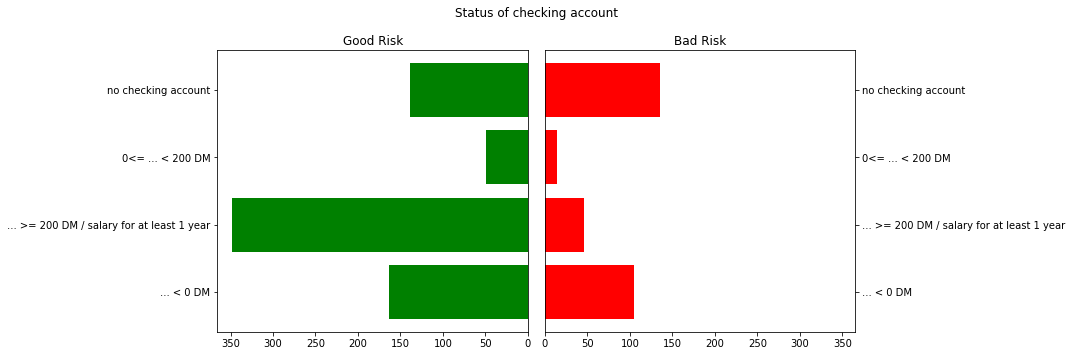

In [9]:
# your code here

### Задание 8  (0.5 балла)

In [4]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

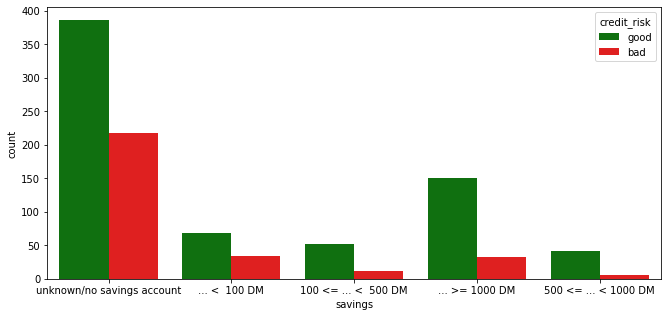

In [539]:
plt.figure(figsize=(11,5))
sns.countplot(x='savings', hue='credit_risk', palette=['green', 'red'], data=data)

plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

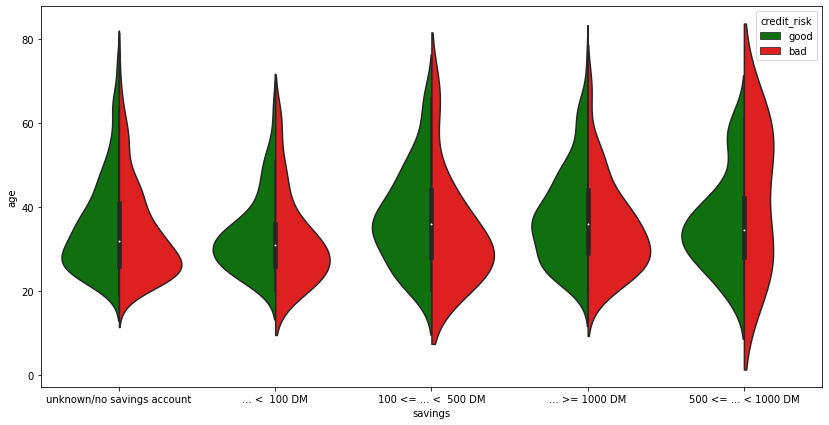

In [160]:
plt.figure(figsize=(14,7))
sns.violinplot(x='savings', y='age', hue='credit_risk', split=True, palette=['green', 'red'], data=data)

plt.show()

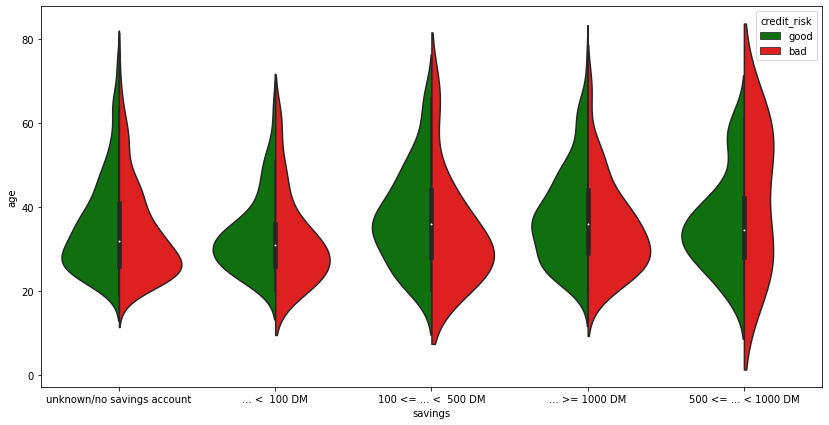

In [12]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

<ipython-input-692-b20a956d3a21>:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([a for a in fig.axes], labels=labels, loc="upper right", borderaxespad=0.5)


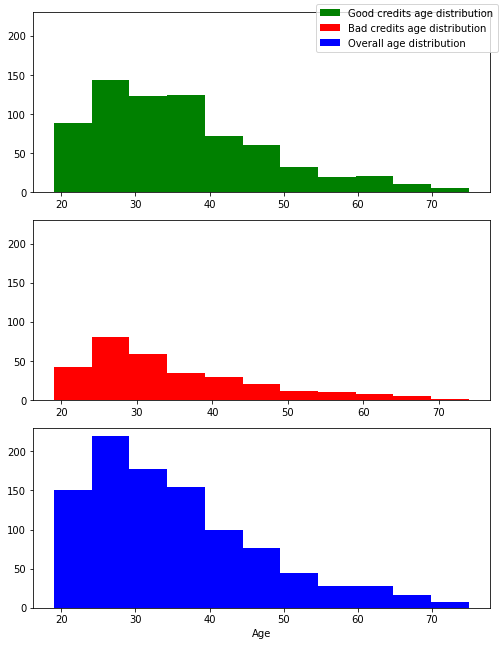

In [692]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 9))

axes[0].hist(data[data.credit_risk == 'good'].age, bins=11, color='green')
axes[0].set_ylim(0,230)
axes[1].hist(data[data.credit_risk == 'bad'].age, bins=11, color='red')
axes[1].set_ylim(0,230)
axes[2].hist(data.age, bins=11, color='blue')



labels = ['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution']
fig.legend([a for a in fig.axes], labels=labels, loc="upper right", borderaxespad=0.5)


plt.xlabel('Age')

fig.tight_layout()

plt.show()

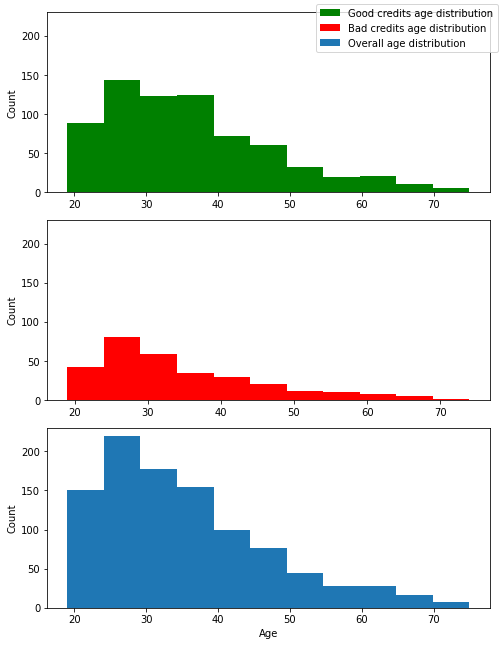

In [13]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

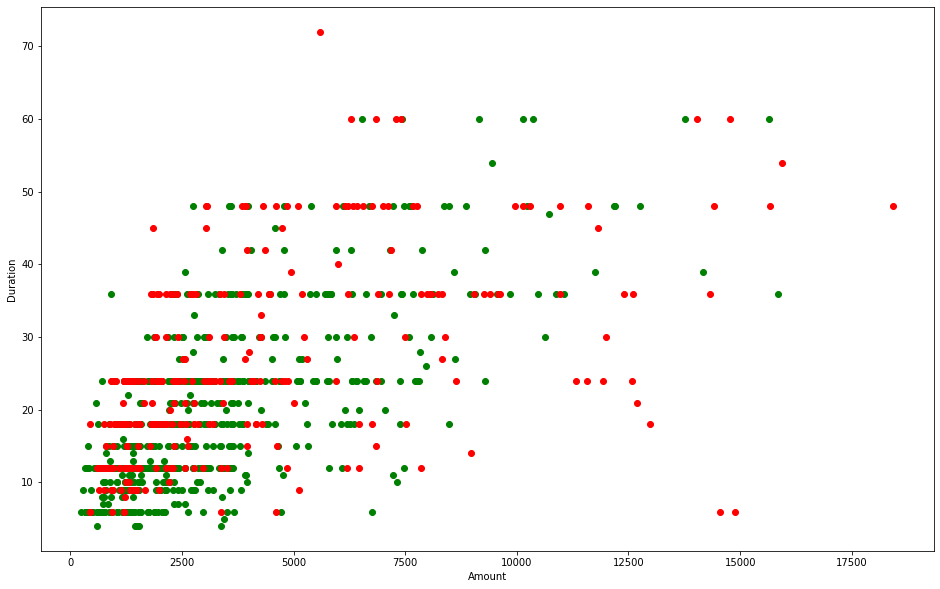

In [68]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.scatter(x = data[data.credit_risk == 'good'].amount, y = data[data.credit_risk == 'good'].duration, c='green')
ax.scatter(x = data[data.credit_risk == 'bad'].amount, y = data[data.credit_risk == 'bad'].duration, c='red')

plt.xlabel('Amount')
plt.ylabel('Duration')

plt.show()

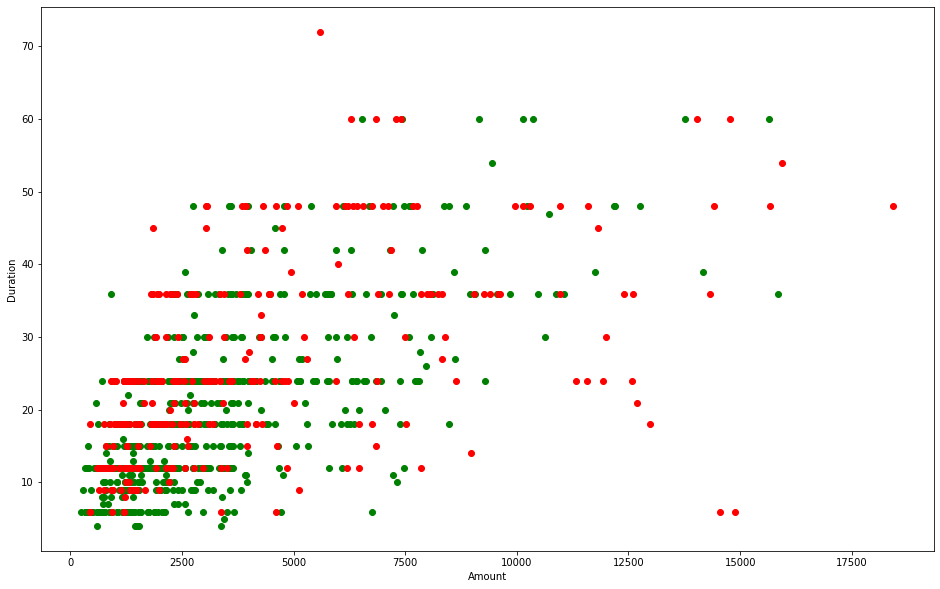

In [67]:
#то же самое

plt.figure(figsize=(16, 10))

arr = np.unique(data.credit_risk)
risks = np.sort(arr)[::-1] #to sort in descending order
colors = ('green', 'red')


for i, risk in enumerate(risks):
    plt.scatter(data=data[data.credit_risk == risk], x='amount', y='duration', c=colors[i])


plt.xlabel('Amount')
plt.ylabel('Duration')

plt.show()

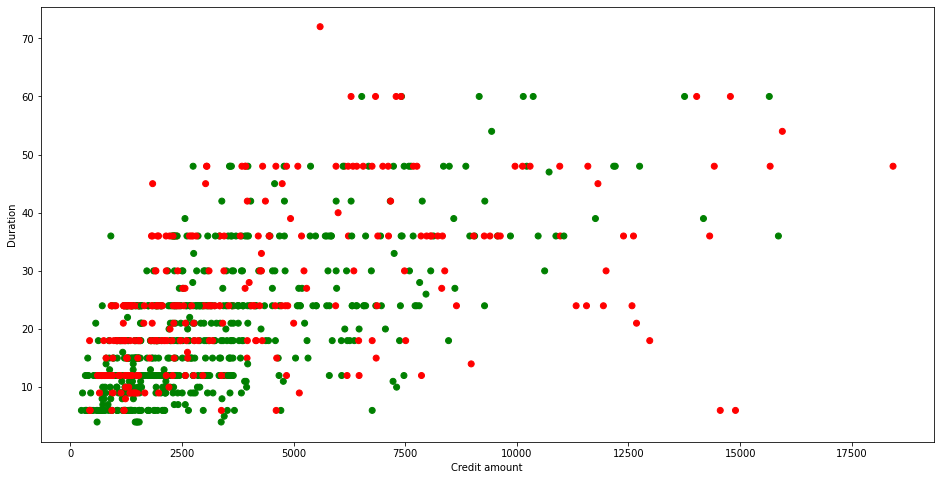

In [21]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

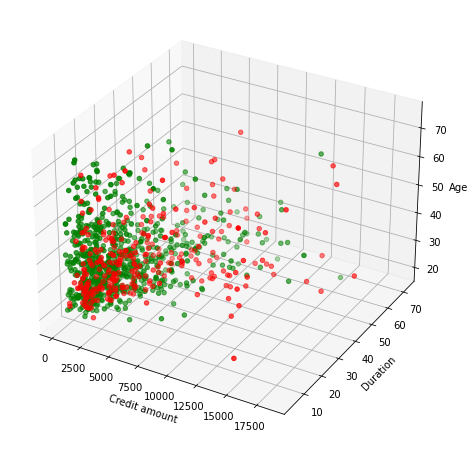

In [380]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

arr = np.unique(data.credit_risk)
risks = np.sort(arr)[::-1]
colors = ('green', 'red')

for i, risk in enumerate(risks):
    x = data[data.credit_risk == risk].amount
    y = data[data.credit_risk == risk].duration
    z = data[data.credit_risk == risk].age  
    ax.scatter(x, y, z, c=colors[i]) # , s=7


ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

#это правильная диаграмма, просто порядок нанесения точек другой

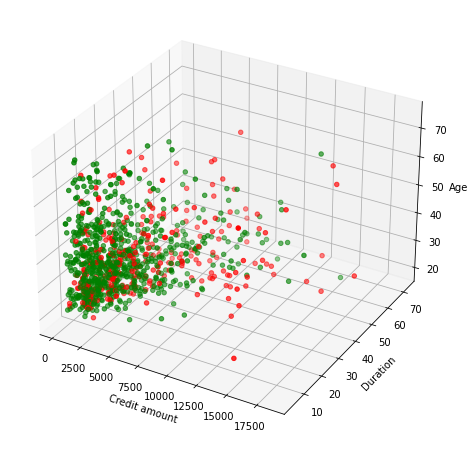

In [15]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
#бинарные признаки: telephone, foreign_worker, credit_risk;
#порядковые признаки: status, savings, employment_duration, installment_rate, present_residence, number_credits, 
#    people_liable;
#категориальные признаки: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, 
#    housing, job

In [20]:
#сначала закодируем бинарные признаки

data['telephone'] = data['telephone'].apply(lambda x: 0 if x == 'no' else 1)

data.foreign_worker = data.foreign_worker.replace(['no', 'yes'], [0, 1])

data.credit_risk = np.where(data.credit_risk == 'good', 1, 0)

In [178]:
data.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,0,0,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,0,0,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,0,0,1


In [23]:
#теперь порядковые
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

le = LabelEncoder()

df = data[['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 
                                                                'number_credits', 'people_liable']].apply(le.fit_transform)                            

In [24]:
data.drop(['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 
                                                                                    'people_liable'], axis=1, inplace=True)
data = pd.concat((df, data), axis=1)
data.head(5)

,status,savings,employment_duration,installment_rate,present_residence,number_credits,people_liable,duration,credit_history,purpose,...,personal_status_sex,other_debtors,property,age,other_installment_plans,housing,job,telephone,foreign_worker,credit_risk
0,3,4,2,2,3,0,0,18,all credits at this bank paid back duly,car (used),...,female : non-single or male : single,none,car or other,21,none,for free,skilled employee/official,0,0,1
1,3,4,0,1,0,1,1,9,all credits at this bank paid back duly,others,...,male : married/widowed,none,unknown / no property,36,none,for free,skilled employee/official,0,0,1
2,0,0,1,1,3,0,0,12,no credits taken/all credits paid back duly,retraining,...,female : non-single or male : single,none,unknown / no property,23,none,for free,unskilled - resident,0,0,1
3,3,4,0,0,0,1,1,12,all credits at this bank paid back duly,others,...,male : married/widowed,none,unknown / no property,39,none,for free,unskilled - resident,0,1,1
4,3,4,0,2,3,1,0,12,all credits at this bank paid back duly,others,...,male : married/widowed,none,car or other,38,bank,rent,unskilled - resident,0,1,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   int32 
 1   savings                  1000 non-null   int32 
 2   employment_duration      1000 non-null   int32 
 3   installment_rate         1000 non-null   int32 
 4   present_residence        1000 non-null   int32 
 5   number_credits           1000 non-null   int32 
 6   people_liable            1000 non-null   int32 
 7   duration                 1000 non-null   int64 
 8   credit_history           1000 non-null   object
 9   purpose                  1000 non-null   object
 10  amount                   1000 non-null   int64 
 11  personal_status_sex      1000 non-null   object
 12  other_debtors            1000 non-null   object
 13  property                 1000 non-null   object
 14  age                      1000 non-null   

In [28]:
#удалим категориальные признаки

dummies = pd.get_dummies(data[['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 
                               'other_installment_plans', 'housing', 'job']])
#Data.drop('Embarked', axis=1, inplace=True)







data.drop(['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 
                                                                                   'housing', 'job'], axis=1, inplace=True)
data = pd.concat((data, dummies), axis=1)
data.head(5)

,status,savings,employment_duration,installment_rate,present_residence,number_credits,people_liable,duration,amount,age,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,3,4,2,2,3,0,0,18,1049,21,...,0,1,0,1,0,0,0,1,0,0
1,3,4,0,1,0,1,1,9,2799,36,...,0,1,0,1,0,0,0,1,0,0
2,0,0,1,1,3,0,0,12,841,23,...,0,1,0,1,0,0,0,0,0,1
3,3,4,0,0,0,1,1,12,2122,39,...,0,1,0,1,0,0,0,0,0,1
4,3,4,0,2,3,1,0,12,2171,38,...,1,0,0,0,0,1,0,0,0,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                                                      Non-Null Count  Dtype
---  ------                                                      --------------  -----
 0   status                                                      1000 non-null   int32
 1   savings                                                     1000 non-null   int32
 2   employment_duration                                         1000 non-null   int32
 3   installment_rate                                            1000 non-null   int32
 4   present_residence                                           1000 non-null   int32
 5   number_credits                                              1000 non-null   int32
 6   people_liable                                               1000 non-null   int32
 7   duration                                                    1000 non-null   int64
 8   amount             

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [30]:
#разобъем признак duration на интервалы 
data.duration = pd.cut(data.duration, 3)

data.duration.head()

0    (3.932, 26.667]
1    (3.932, 26.667]
2    (3.932, 26.667]
3    (3.932, 26.667]
4    (3.932, 26.667]
Name: duration, dtype: category
Categories (3, interval[float64]): [(3.932, 26.667] < (26.667, 49.333] < (49.333, 72.0]]

In [31]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data.duration = label.fit_transform(data.duration)

data.duration.value_counts()
data.head(10)

,status,savings,employment_duration,installment_rate,present_residence,number_credits,people_liable,duration,amount,age,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,3,4,2,2,3,0,0,0,1049,21,...,0,1,0,1,0,0,0,1,0,0
1,3,4,0,1,0,1,1,0,2799,36,...,0,1,0,1,0,0,0,1,0,0
2,0,0,1,1,3,0,0,0,841,23,...,0,1,0,1,0,0,0,0,0,1
3,3,4,0,0,0,1,1,0,2122,39,...,0,1,0,1,0,0,0,0,0,1
4,3,4,0,2,3,1,0,0,2171,38,...,1,0,0,0,0,1,0,0,0,1
5,3,4,2,3,1,1,1,0,2241,48,...,0,1,0,1,0,0,0,0,0,1
6,3,4,1,3,3,1,0,0,3398,39,...,0,1,0,0,0,1,0,0,0,1
7,3,4,2,1,3,0,1,0,1361,40,...,0,1,0,0,0,1,0,0,0,1
8,1,4,4,2,3,1,0,0,1098,65,...,0,1,0,0,0,1,0,0,1,0
9,0,2,4,3,3,0,0,0,3758,23,...,0,1,0,1,0,0,0,0,1,0


In [32]:
#то же самое проделаем с amount
data.amount = pd.cut(data.amount, 5)


from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data.amount = label.fit_transform(data.amount)

data.amount.value_counts()
data.head(10)

,status,savings,employment_duration,installment_rate,present_residence,number_credits,people_liable,duration,amount,age,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,3,4,2,2,3,0,0,0,0,21,...,0,1,0,1,0,0,0,1,0,0
1,3,4,0,1,0,1,1,0,0,36,...,0,1,0,1,0,0,0,1,0,0
2,0,0,1,1,3,0,0,0,0,23,...,0,1,0,1,0,0,0,0,0,1
3,3,4,0,0,0,1,1,0,0,39,...,0,1,0,1,0,0,0,0,0,1
4,3,4,0,2,3,1,0,0,0,38,...,1,0,0,0,0,1,0,0,0,1
5,3,4,2,3,1,1,1,0,0,48,...,0,1,0,1,0,0,0,0,0,1
6,3,4,1,3,3,1,0,0,0,39,...,0,1,0,0,0,1,0,0,0,1
7,3,4,2,1,3,0,1,0,0,40,...,0,1,0,0,0,1,0,0,0,1
8,1,4,4,2,3,1,0,0,0,65,...,0,1,0,0,0,1,0,0,1,0
9,0,2,4,3,3,0,0,0,0,23,...,0,1,0,1,0,0,0,0,1,0


In [33]:
#также отмасштабируем значения признака age
data.age = pd.cut(data.age, 5)


from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data.age = label.fit_transform(data.age)

data.age.value_counts()
data.head(10)

,status,savings,employment_duration,installment_rate,present_residence,number_credits,people_liable,duration,amount,age,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,3,4,2,2,3,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,3,4,0,1,0,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2,0,0,1,1,3,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,3,4,0,0,0,1,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
4,3,4,0,2,3,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
5,3,4,2,3,1,1,1,0,0,2,...,0,1,0,1,0,0,0,0,0,1
6,3,4,1,3,3,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
7,3,4,2,1,3,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
8,1,4,4,2,3,1,0,0,0,4,...,0,1,0,0,0,1,0,0,1,0
9,0,2,4,3,3,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
#все три признака могут влиять на целевую переменную, но их излишняя детализированность может вноситить лишние шумы или
#приводить к переобучению, поэтому следовало разбить их значения на интервалы для большей информативности

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

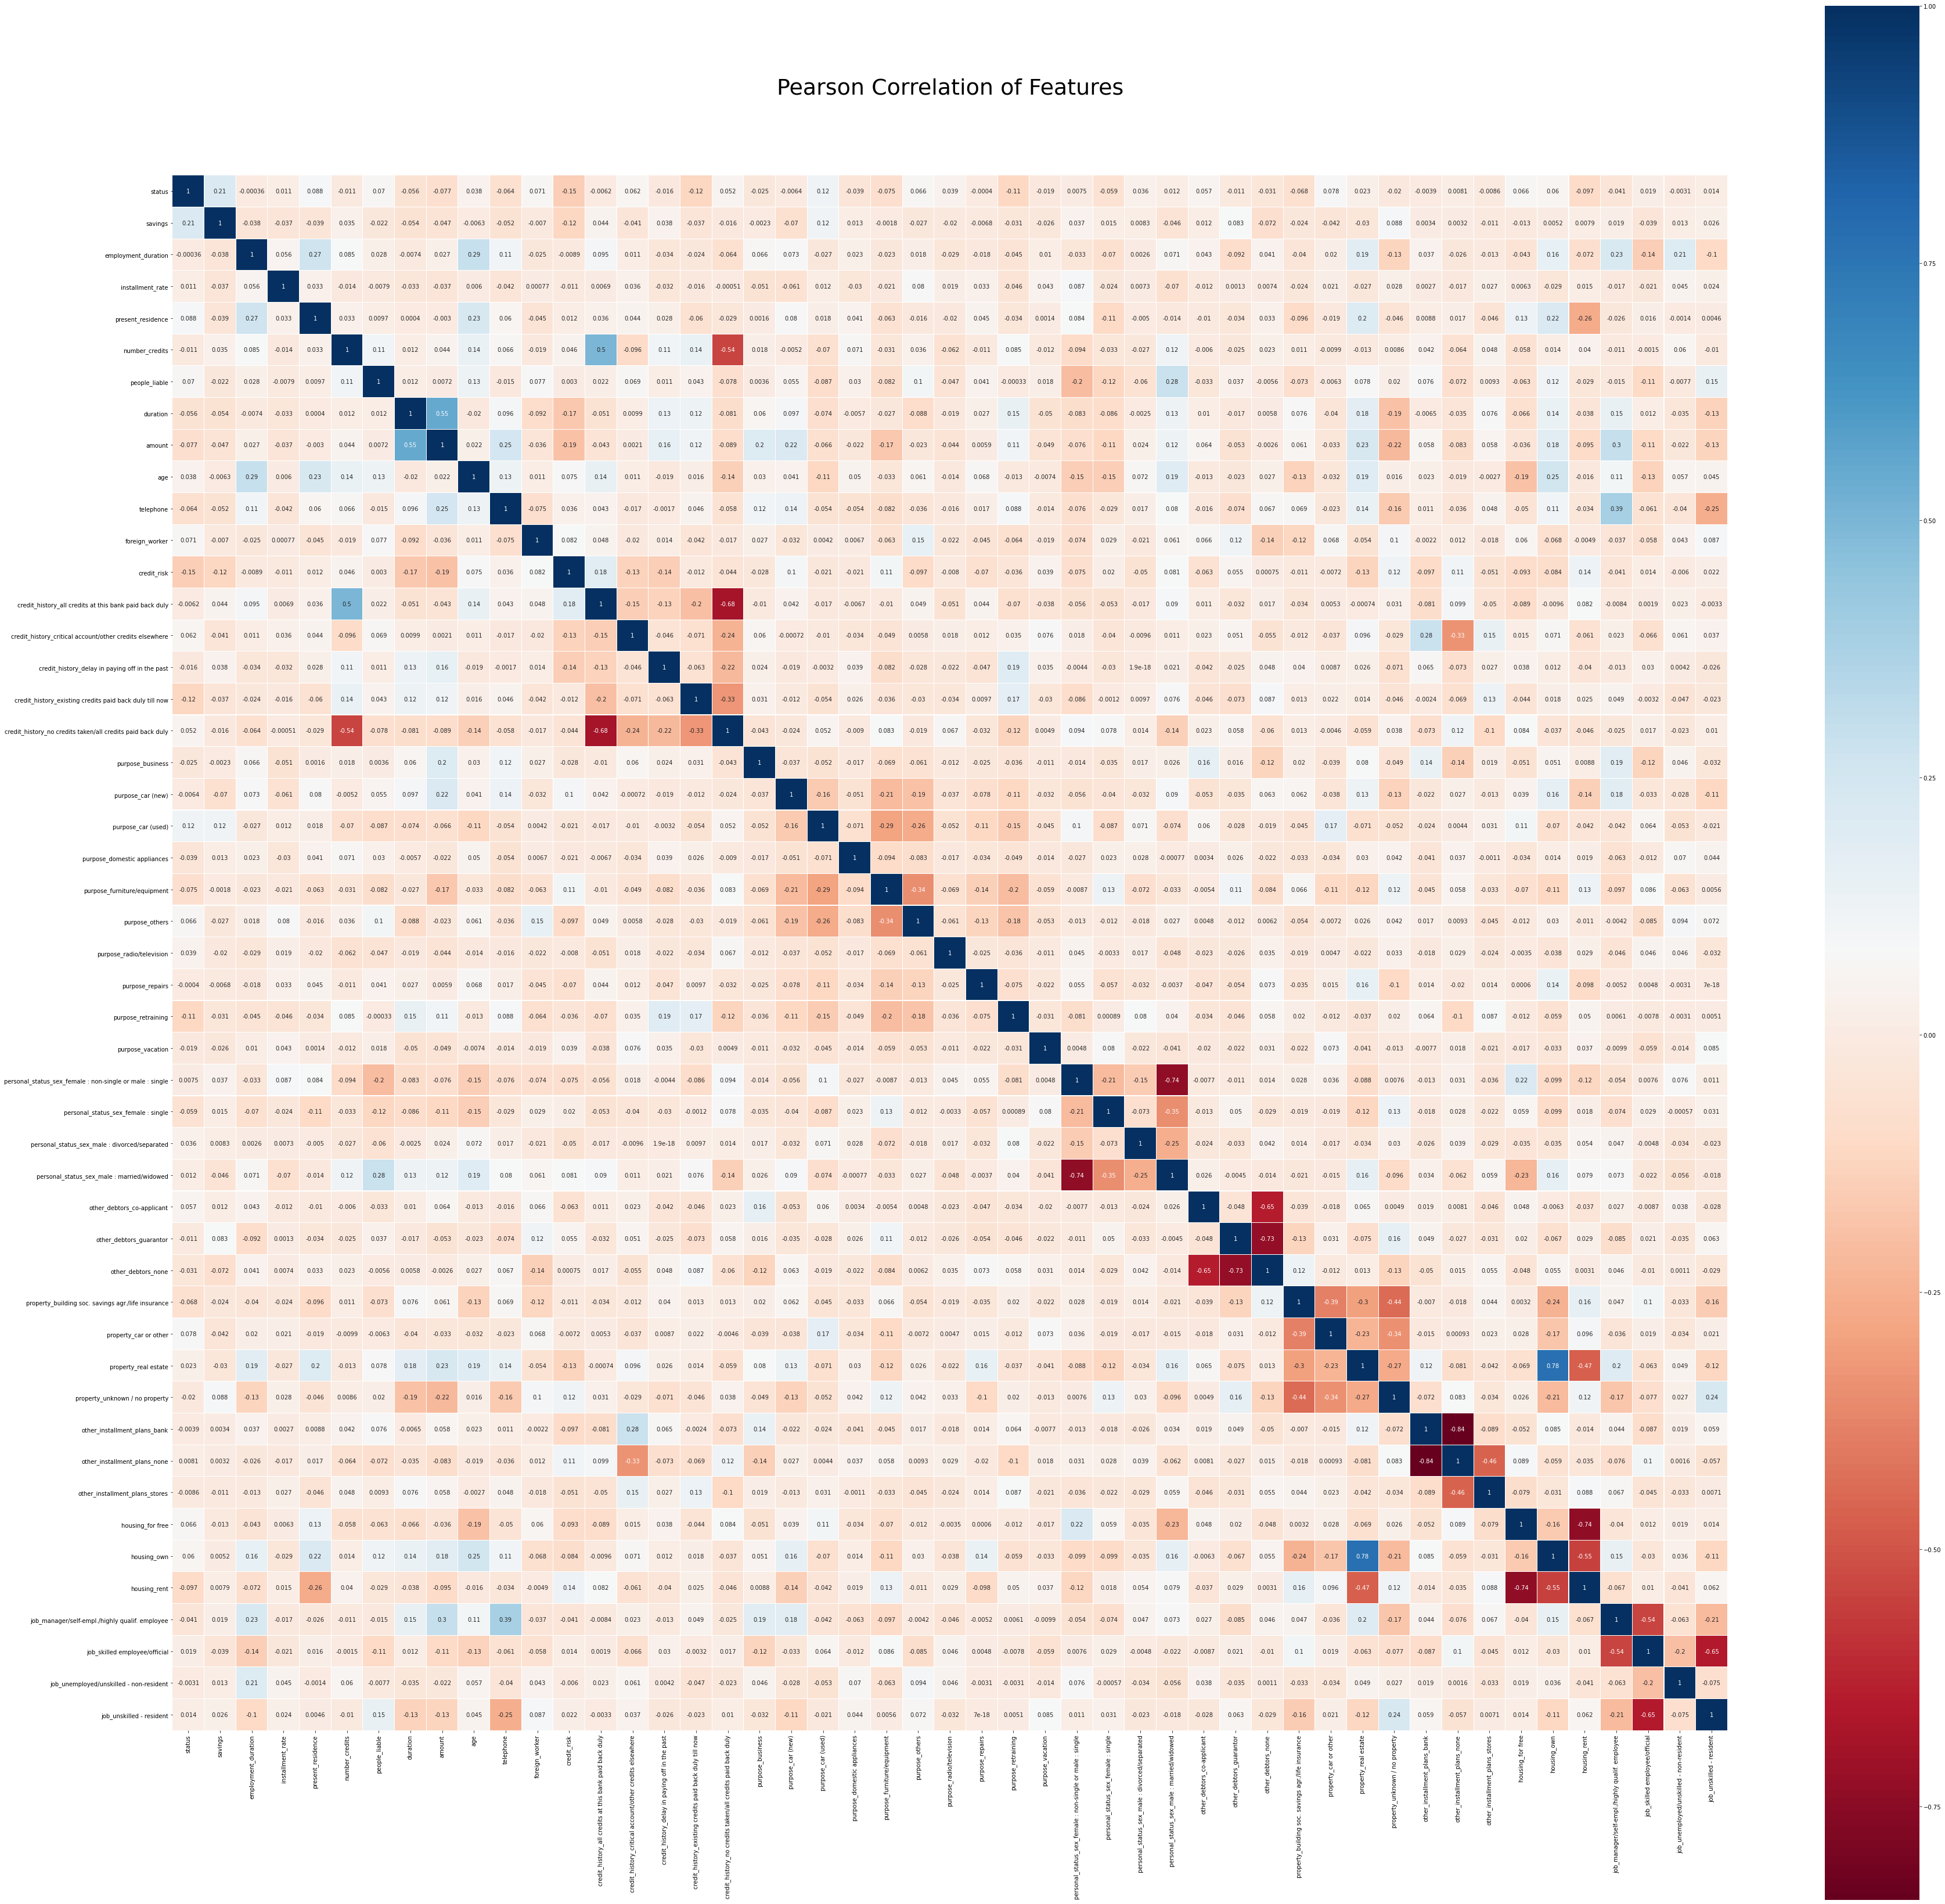

In [34]:
#посмотрим на корреляцию всех признаков с таргетом

colormap = plt.cm.RdBu
plt.figure(figsize=(60, 60))

plt.title('Pearson Correlation of Features', y=1.05, size=38)
sns.heatmap(data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [85]:
#я выбрала 6 признаков, значения которых сильнее остальных коррелируют со значениями целевой переменной
#их индексы: 8, 13, 7, 0, 15, 44, - по убыванию значения модуля коэффициента корреляции (15 не брала в predict(Xtest), т.к. 
#с ним accuracy_score() чуть меньше)
#далее посмотрела на знак коэффициента для каждого значения и учитывала в функции наибольшее либо наименьшее значение 
#признака в соответствии с этим знаком

def predict(Xtest: np.array) -> np.array:
    answers = pd.DataFrame(Xtest).apply(lambda row: 1 if ((row[0] == 0) | (row[7] == 0) |  (row[8] == 0) | (row[13] == 1) | 
                                                         (row[44] == 1)) else 0, axis=1)
    
#    answers = pd.DataFrame(Xtest).apply(lambda row: 1 if ((row[0] == 0) * 0.2 + (row[7] == 0) * 0.2 + (row[8] == 0) * 0.2 + 
#              (row[13] == 1) * 0.2 + (row[44] == 1) * 0.2) >= 0.2 else 0, axis=1) # то же самое, но в виде формулы
    
    return answers

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение


accuracy_score(y_test, predict(X_test))
#predict(X_test).value_counts()

0.66

In [52]:
data.columns

Index(['status', 'savings', 'employment_duration', 'installment_rate',
       'present_residence', 'number_credits', 'people_liable', 'duration',
       'amount', 'age', 'telephone', 'foreign_worker', 'credit_risk',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/other credits elsewhere',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_furniture/equipment',
       'purpose_others', 'purpose_radio/television', 'purpose_repairs',
       'purpose_retraining', 'purpose_vacation',
       'personal_status_sex_female : non-single or male : single',
       'personal_status_sex_female : single',
       'personal_status_sex_male : divorced/separated',
       'personal_status_sex_male

In [40]:
pd.DataFrame(data.columns)

,0
0,status
1,savings
2,employment_duration
3,installment_rate
4,present_residence
5,number_credits
6,people_liable
7,duration
8,amount
9,age


In [191]:
#data[data.credit_risk == 1].columns.value_counts().max() ????????????????

#data[data.credit_risk == 1].status.value_counts()

In [194]:
#здесь я просто решила логически подумать, что может повлиять на рискованность выдачи кредита тому или иному клиенту
#выбрав подходящие признаки, я проверила, при каких их значениях чаще всего встречаюся положительные кейсы (data[data.credit_risk == 1].status.value_counts(), ...)
#вообще это не совсем помогло, сначала я вписала в predict(Xtest) полученные таким способом значения 
#выбранных признаков, но после на рандом поменяла некоторые из них, и accuracy_score(y_test, predict(X_test)) повысился :)
#так все и оставила


def predict(Xtest: np.array) -> np.array:
    answers = pd.DataFrame(Xtest).apply(lambda row: 1 if ((row[0] == 1) | (row[1] == 0) | (row[2] == 2) | 
                                                         (row[7] == 0) | (row[8] == 0)) else 0, axis=1) #  | (row[9] == 0) | (row[9] == 4)
    return answers

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение


accuracy_score(y_test, predict(X_test))
#predict(X_test).value_counts()

0.692